## **Assignment 2**
---

**Author:** Anthony Stachowski  
**NetID**: astacho1  

### **Instructions**
This assignment includes a series of questions designed to help you practice the fundamentals of data analytics in Python. For each question, provide a complete answer below it using code cell(s). Be sure your answers are sensible, code-based (e.g., programmatic as opposed to hard-coded) and provide sufficient comments for clarity.

Before you begin, be sure to do the following to help identify your submission:

1. Rename this Jupyter Notebook to include your last/first name (e.g., 70260-03_Assignment2_Dobolyi_David.ipynb).
2. Fill in your name and NetID (e.g., ddobolyi) at the top of this Notebook.

Your final submission to Blackboard must contain two files:

1. This Notebook with your completed answers, which runs from top-to-bottom without errors (e.g., 70260-03_Assignment2_Dobolyi_David.ipynb).
2. An HTML export of this Notebook (e.g., 70260-03_Assignment2_Dobolyi_David.html).

After completing the assignment, to ensure your solution is complete and to generate the HTML export, be sure to:

1. Perform a full reset of your Notebook to double-check that your submission is fully working. To do this, go to Kernel -> Restart Kernel and Run All Cells... in the main menu.
2. Generate a HTML export using File -> Export Notebook As... -> Export Notebook to HTML in the main menu.

Finally, to upload your files to Sakai, you may need to zip them first, particularly when it comes to the HTML portion of the submission. For instructions on how to zip a file, see the following [link](https://www.sweetwater.com/sweetcare/articles/how-to-zip-and-unzip-files/) for visual examples.

##### **Data** 
A file named 70260-03_Assignment2_Data.zip is provided with this assignment. Unzip it to find the data files you will need to answer several of the questions below.

##### **Notes**
Assignment 2 is individual work -- please do not collaborate with others while completing this assignment.

### **Imports**

Place all your imports in the code cell below to streamline your script.

***Note***. The seaborn style has also been set as a suggestion for the rest of this script.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set(font_scale = 1)

### **Data Description**

These data represent information about subscribers of a company that sells educational videos on demand across several platform including Android and iOS. There are 98 columns in total, and the following is a list of key columns that are relevant to this assignment/understanding the data:

- **IntlPlatform:** initial platform (e.g., "Android", "iOS", "ROKU") the customer used when first becoming a paying subscriber (note: some platforms are NA [unknown])
- **LTDStreamedHrs:** lifetime to date streamed video hours (i.e., how much streaming video has a customer watched in his or her lifetime as an active subscriber [measured in hours]?)
- **TenureDays:** length of customer tenure in days (i.e., for how many days has this customer been an active subscriber [if CustStatus is currently "Entitled"] or for how many days was this customer an active subscriber [if CustStatus is currently "Cancelled"; see CustStatus for more information]?)
- **CustStatus:** current customer status (i.e., is this customer's subscription currently considered "Cancelled" [meaning he or she is not currently an active subscriber] or is this customer's status currently "Entitled" [meaning he or she is a current, active, paying subscriber]?)
- **IntlSubjectCategory:** initial video subject category (e.g., "Health, Fitness & Nutrition" or "Science", etc.) the customer watched after first becoming a subscriber
- **IntlSubWeek:** the week the subject first became a subscriber (%Y-%m-%d date format)
- **LTDNumPlatforms:** the lifetime to date number of platforms the customer has viewed content on (e.g., a customer may have an IntlPlatform of "iOS" but may have also watched video since then on an "Apple TV" and "ROKU", making the total number of lifetime platforms three so far in this instance)
- **LTDNumSubjectBin:** a binned version of LTDNumSubjects, indicating the number of video subject categories that a customer has watched in his or her lifetime thus far

### **Initial Steps**

Run the following code cells to read in and initialize the data you'll be using for the rest of the assignment:

In [2]:
dat = pd.read_csv('TGCPlus_consumption_data.csv', encoding = 'ISO-8859-1')

In [3]:
dat.head()

,AsofDate,uuid,CountryCode,IntlCampaignID,IntlCampaignName,IntlMD_Country,IntlMD_Audience,IntlMD_Channel,IntlMD_ChannelID,IntlMD_PromotionType,...,DS0Mnth_CourseWatchBin,DS0Mnth_NumLectures,DS0Mnth_LectureWatchBin,DS0Mnth_NumDaysWatched,DS0Mnth_NumPlatform,DS0Mnth_NumPlays,DS0Mnth_NumSubjects,DS0Mnth_NumSubjectBin,DS0Mnth_StreamedMins,DS0Mnth_StreamedMinsBin
0,2016-06-21,00000150-2ef5-dc36-a35e-eff7f5130000,US,120092,TGCPlus: ROKU Default CampaignCode,US,Subscription_Prospect,OTT Device Marketing,53,OTT Device Marketing: Roku,...,3) 4-7 courses,19.0,3) 16-50 Lectures,2.0,1.0,27.0,4.0,3) 3-4 Subjects,637.5,10) 500.5-800 mins
1,2016-06-21,00000150-3197-d958-ab53-3fd7579a0000,US,120091,TGCPlus: Default CampaignCode,US,Subscription_Prospect,Prospect Web,16,Prospect Web: Prospect Web Default Codes,...,2) 2-3 courses,1.0,1) 1-5 Lectures,3.0,1.0,3.0,3.0,3) 3-4 Subjects,54.0,5) 50.5-80 mins
2,2016-06-21,00000151-3893-df1e-a557-fefb57950000,US,119477,The Great Courses Plus Default Landing Page,US,Subscription_Prospect,Prospect Web,16,Prospect Web: Prospect Web Default Codes,...,4) >= 8 courses,11.0,2) 6-15 Lectures,16.0,1.0,109.0,9.0,5) >= 7 Subjects,1808.0,12) 1300.5-2000 mins
3,2016-06-21,00000151-3956-dd72-a1fb-bbf692030000,US,121923,Plus Page on TGC.com - Traffic to Plus,US,Subscription_Prospect,House Miscellaneous,43,House Miscellaneous: Miscellaneous,...,4) >= 8 courses,30.0,3) 16-50 Lectures,19.0,3.0,197.0,7.0,5) >= 7 Subjects,690.0,10) 500.5-800 mins
4,2016-06-21,00000150-32d0-de78-a75a-72d8db4f0000,US,120092,TGCPlus: ROKU Default CampaignCode,US,Subscription_Prospect,OTT Device Marketing,53,OTT Device Marketing: Roku,...,1) 1 course,2.0,1) 1-5 Lectures,2.0,1.0,4.0,1.0,1) 1 Subject,38.0,4) 30.5-50 mins


In [4]:
dat.dtypes

AsofDate                    object
uuid                        object
CountryCode                 object
IntlCampaignID               int64
IntlCampaignName            object
                            ...   
DS0Mnth_NumPlays           float64
DS0Mnth_NumSubjects        float64
DS0Mnth_NumSubjectBin       object
DS0Mnth_StreamedMins       float64
DS0Mnth_StreamedMinsBin     object
Length: 98, dtype: object

### **Question 1** [1 Point]

Permanently remove all the columns from dat except for the following eight mentioned in the [Data Description](#Data-Description) above: IntlPlatform, LTDStreamedHrs, TenureDays, CustStatus, IntlSubjectCategory, IntlSubWeek, LTDNumPlatforms, and LTDNumSubjectBin. Be sure to show the head, data types, and dimensions of the data after making this change.

***Hint:*** The correct dimensions should be 25840 rows and 8 columns.

In [5]:
dat = dat[['IntlPlatform', 'LTDStreamedHrs', 'TenureDays', 'CustStatus', 'IntlSubjectCategory', 'IntlSubWeek', 'LTDNumPlatforms', 'LTDNumSubjectBin']]

dat.head(5)

,IntlPlatform,LTDStreamedHrs,TenureDays,CustStatus,IntlSubjectCategory,IntlSubWeek,LTDNumPlatforms,LTDNumSubjectBin
0,ROKU,10.625000,263,Cancelled,Science,2015-09-28,1.0,3) 3-4 Subjects
1,ROKU,0.900000,255,Entitled,Science,2015-10-12,1.0,3) 3-4 Subjects
2,WebSite,168.733333,211,Entitled,"Health, Fitness & Nutrition",2015-11-23,3.0,5) >= 7 Subjects
3,WebSite,57.991666,211,Entitled,Literature & Language,2015-11-23,3.0,5) >= 7 Subjects
4,ROKU,0.633333,262,Cancelled,Professional & Personal Development,2015-10-05,1.0,1) 1 Subject


In [6]:
dat.dtypes

IntlPlatform            object
LTDStreamedHrs         float64
TenureDays               int64
CustStatus              object
IntlSubjectCategory     object
IntlSubWeek             object
LTDNumPlatforms        float64
LTDNumSubjectBin        object
dtype: object

In [7]:
dat.shape

(25840, 8)

### **Question 2** [1 Point]

Convert the data type of IntlSubWeek to `datetime64[ns]` and show the data types of dat again afterwards to verify the change has been made.

In [8]:
dat.IntlSubWeek = pd.to_datetime(dat.IntlSubWeek)

dat.dtypes

IntlPlatform                   object
LTDStreamedHrs                float64
TenureDays                      int64
CustStatus                     object
IntlSubjectCategory            object
IntlSubWeek            datetime64[ns]
LTDNumPlatforms               float64
LTDNumSubjectBin               object
dtype: object

### **Question 3** [2 Points]

Using seaborn, create a **countplot** of the number of rows in the data based on IntlPlatform.

***Note:*** If your bars appear very thin, consider adjust the *dodge* argument.

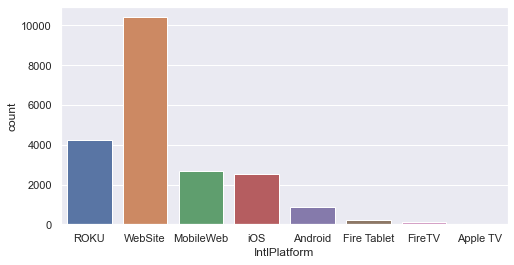

In [9]:
plt.figure(figsize = (8, 4))
s1 = sns.countplot(x = 'IntlPlatform', data = dat)

### **Question 4** [2 Points]

Using pandas, create a frequency table of IntlPlatform, making sure to show missing (NaN) values.

In [10]:
dat.IntlPlatform.value_counts(dropna = False)

WebSite        10416
NaN             4735
ROKU            4256
MobileWeb       2698
iOS             2536
Android          864
Fire Tablet      203
FireTV           131
Apple TV           1
Name: IntlPlatform, dtype: int64

### **Question 5** [2 Points]

Permanently drop any platform(s) from the dataset that contain very few observations (i.e., fewer than 10) as well as those with an NaN (unknown) platform. How many rows remain in dat (i.e., show this via **len**)? 

***Hint:*** The correct answer is 21104.

In [11]:
dat = dat[dat.IntlPlatform!='Apple TV']
dat = dat[dat.IntlPlatform.notna()]

len(dat)

21104

### **Question 6** [2 Points]

Compute mean LTDStreamedHrs grouped by IntlPlatform using pandas and show the result in descending order. Which platforms have the most and least mean number of hours streamed, respectively (i.e., provide a comment with your answer)?

In [12]:
grouped1 = dat.groupby('IntlPlatform')['LTDStreamedHrs'].mean().reset_index()

grouped1.sort_values('LTDStreamedHrs', ascending=False)

# Most Mean Number of Hours Streamed: WebSite
# Least Mean Number of Hours Streamed: FireTV

,IntlPlatform,LTDStreamedHrs
5,WebSite,19.874391
3,MobileWeb,19.362703
4,ROKU,18.868358
1,Fire Tablet,18.745279
6,iOS,17.829485
0,Android,15.446074
2,FireTV,6.362436


### **Question 7** [2 Points]

Plot mean LTDStreamedHrs split up by IntlPlatform (i.e., similar to Question 6) as a bar plot using either seaborn or pandas. Make sure the plot is sorted descending (i.e., tallest bar on the left and shortest on the right).

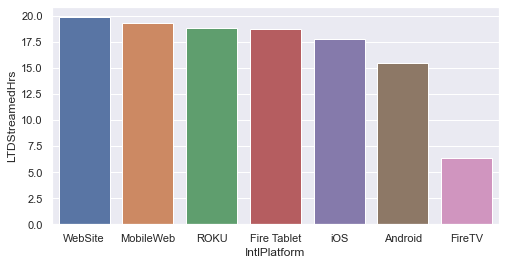

In [13]:
plt.figure(figsize = (8, 4))
s2 = sns.barplot(x = 'IntlPlatform',
                 y = 'LTDStreamedHrs',
                 data = grouped1,
                 order = grouped1.sort_values('LTDStreamedHrs', ascending=False).IntlPlatform)

### **Question 8** [1 Points]

Create another version of your bar plot from Question 7 so that this time it is sorted alphabetically relative to IntlPlatform on the x-axis (i.e., rather than sorting relative to the bar plot values on the y-axis).

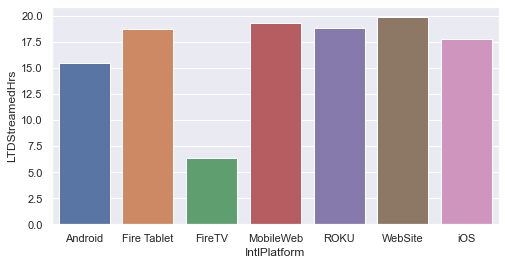

In [14]:
plt.figure(figsize = (8, 4))
s3 = sns.barplot(x = 'IntlPlatform',
                 y = 'LTDStreamedHrs',
                 data = grouped1,
                 order = grouped1.sort_values('IntlPlatform').IntlPlatform)

### **Question 9** [3 Points]

Compute means for LTDStreamedHrs grouped by IntlPlatform again, but this time divide LTDStreamedHrs by TenureDays before computing means within IntlPlatform. Plot these results as another bar plot and explain how your figure changed relative to the the bar plot in the previous question. 

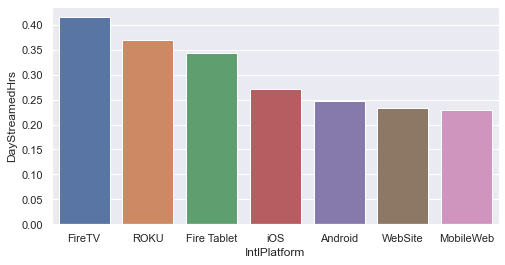

In [15]:
DayStreamedHrs = dat['LTDStreamedHrs'] / dat.TenureDays
dat['DayStreamedHrs'] = DayStreamedHrs

grouped2 = dat.groupby('IntlPlatform')['DayStreamedHrs'].mean().reset_index()

plt.figure(figsize = (8, 4))
s4 = sns.barplot(x = 'IntlPlatform',
                 y = 'DayStreamedHrs',
                 data = grouped2,
                 order = grouped2.sort_values('DayStreamedHrs', ascending=False).IntlPlatform)

##### Answers on Graphs from Question 7 and 9:
FireTV has the highest mean now whereas previously it had the lowest mean.  This is because it was used most often per tenure day among the suscribers.  While WebSite had the highest mean of lifetime to date hours, when it is used, it is not used for as long of a period within a tenure day.  FireTV has a lower average lifetime to date use, but is used for a longer period of time on average, when it is used.

### **Question 10** [4 Points]

Compute how many customers subscribed in each week within the dataset (i.e., IntlSubWeek) relative to IntlPlatform. Plot these pre-computed results using the seaborn **scatterplot** function with time on the x-axis and IntlPlatform on the y-axis; color the points relative to IntlPlatform and size them relative to the number of weekly subscriptions in each observation.

Finally, answer these questions using your plot: 

- **(A)** Which recent month range was associated with a large uptick in ROKU subscribers?
- **(B)** Which platform has the shortest range of initial subscriber dates?

***Notes/Hints:***

1. If you would like to adjust the range of point sizes on the plot in seaborn for better interpretability, explore the *sizes* argument.
2. It may help to make the plot larger to answer the latter part of this question (see [Unit 7](https://github.com/davedgd/python-bootcamp/blob/master/Unit%207/Python-Bootcamp-Unit7.ipynb) in the python-bootcamp for details).
3. To move the legend outside of the plot, see the top answer to this Stack Overflow [question]((https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)).

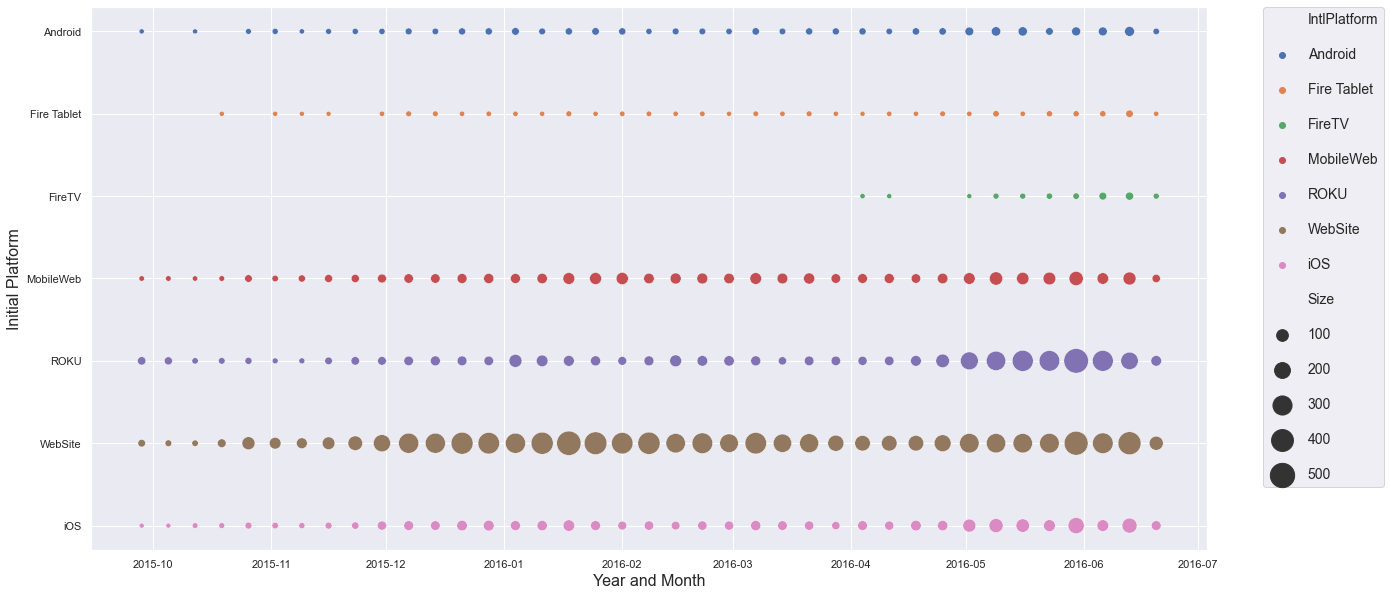

In [16]:
grouped3 = dat.groupby(['IntlPlatform', 'IntlSubWeek']).size().reset_index(name='Size')

plt.figure(figsize = (20, 10))

s5 = sns.scatterplot(x = 'IntlSubWeek', 
                     y = 'IntlPlatform', 
                     hue = 'IntlPlatform', 
                     size = 'Size', 
                     data = grouped3,
                     sizes = (25,600))

plt.legend(bbox_to_anchor = (1.05, 1), 
           loc = 2, 
           borderaxespad = 0.,
           labelspacing = 1.5,
           fontsize = 14)

s5.set_xlabel('Year and Month',fontsize = 16);
s5.set_ylabel('Initial Platform',fontsize = 16);

##### Answers to subparts of question 10:

(A) May 2016 saw a large uptick in Roku Customers

(B) FireTV has the shortest range.